#KNN K-Neighbors Classifier

###KNN Example with the Forge data for Classification examples

In [4]:
!pip install mglearn
import mglearn
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.1 MB/s eta 0:00:00


X.shape: (26, 2)


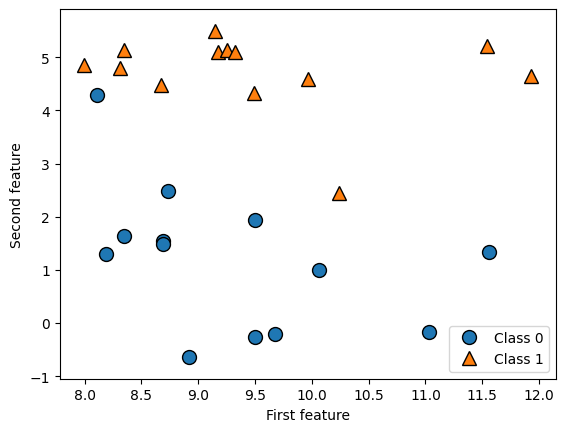

In [5]:
#Generate dataset
X, Y = mglearn.datasets.make_forge()
#Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

###KNN neighbors with only one neighbor

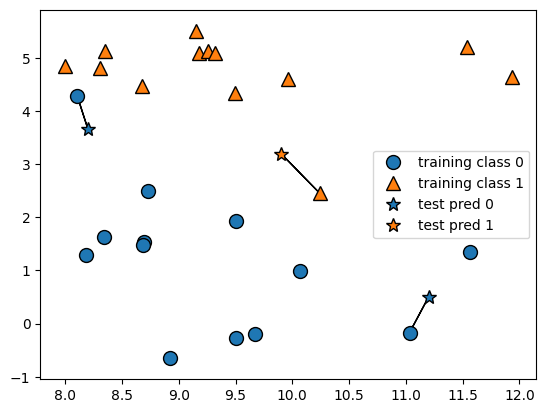

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

###KNN neighbors with 3 neighbors

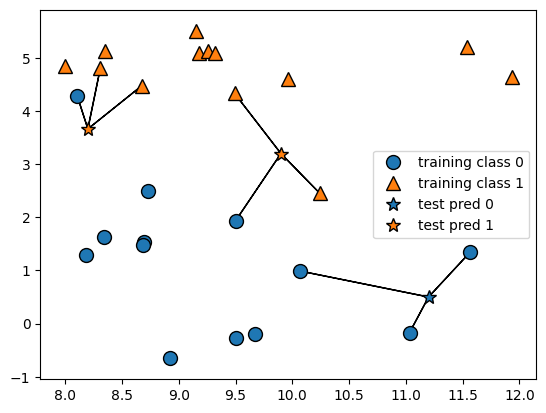

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### Visualization Decision Boundaries for 1, 3, 9 and 13 neighbors

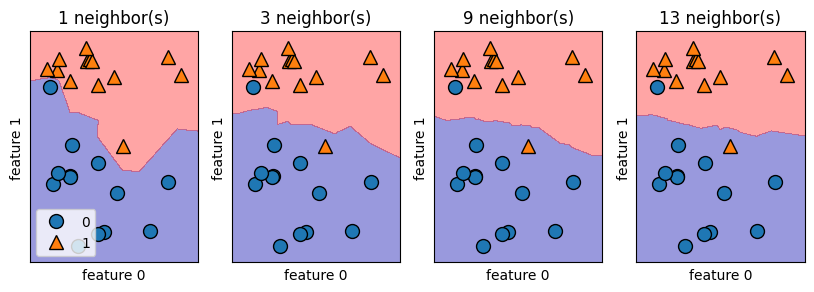

In [8]:
from sklearn.neighbors import KNeighborsClassifier
fig, axes = plt.subplots(1,4, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3 , 9, 13], axes):
  #the fit methoda return the object self, so we can instantiate and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, Y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], Y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

##KNN Regression with Breast Cancer Dataset

###Load Dataset and Measure accuracy between Training and Testing data result with KNN

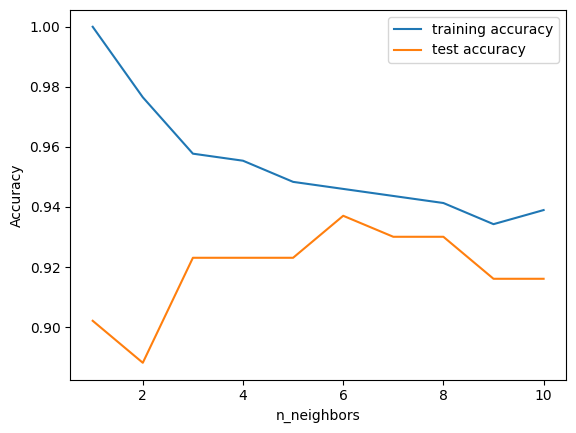

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  #build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, Y_train)

  # record training set accuracy
  training_accuracy.append(clf.score(X_train, Y_train))

  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, Y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

###KNN regression mglearn data with 1 neighbor

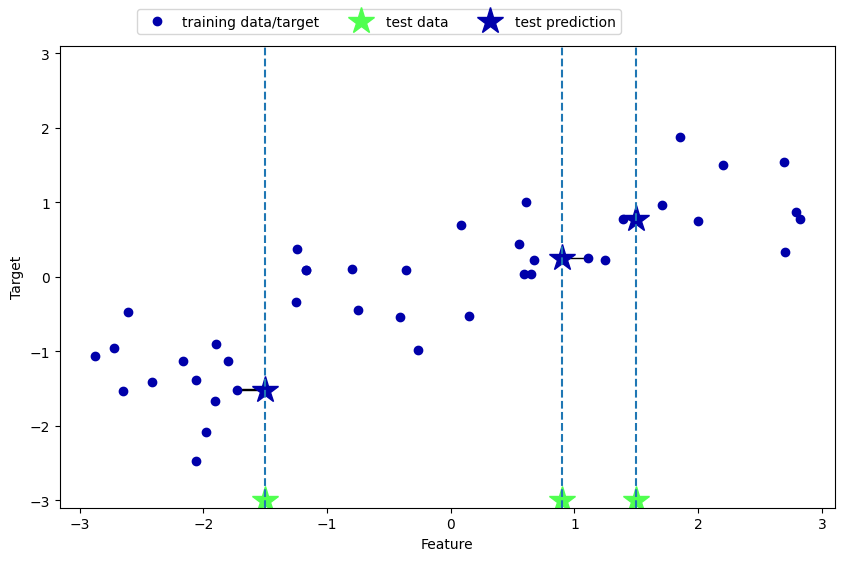

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

###KNN regresion with 3 neighbors

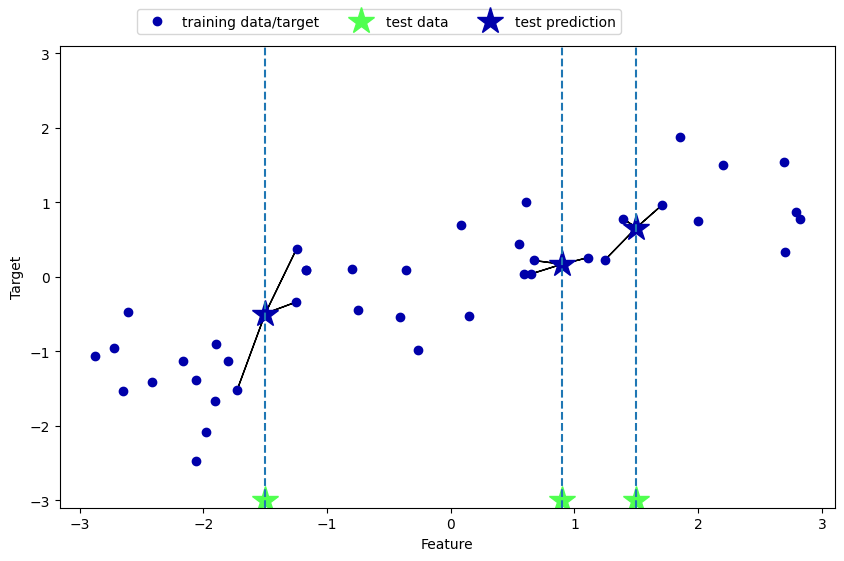

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

###Test Set Prediction with Mglearn data in KNN Regressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor

X, Y = mglearn.datasets.make_wave(n_samples=40)

#split the wave dataset into a training and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

#instantiate the model and set the number of neighbors to 3
reg = KNeighborsRegressor(n_neighbors=3)

#fit the model using the training data and training targets
reg.fit(X_train, Y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


###Score of the model prediction

In [14]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, Y_test)))

Test set R^2: 0.83


###Analyzing KNeighborsRegressor with 3 neighbors (1, 3, 9)

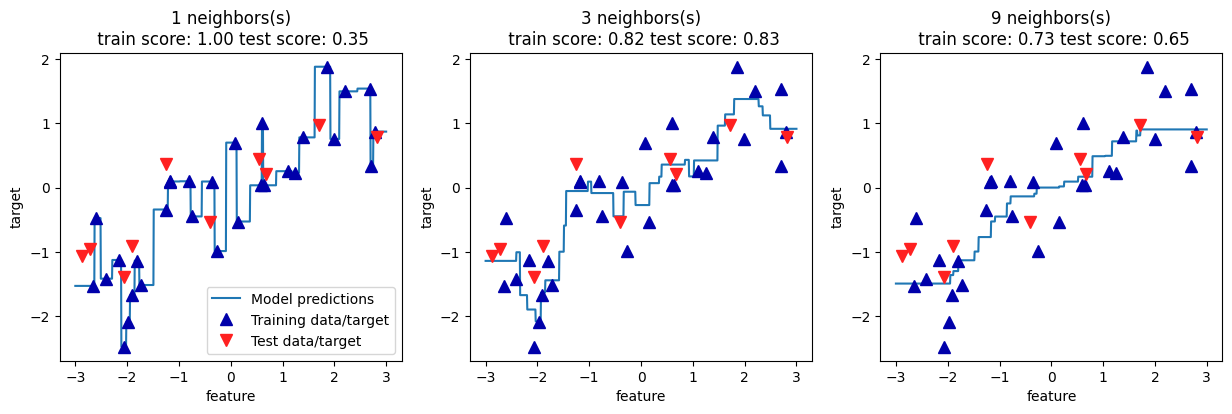

In [16]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
  #make predictios using 1, 3, or 9 neighbors
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, Y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, Y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, Y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
      "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
      n_neighbors, reg.score(X_train, Y_train), reg.score(X_test, Y_test),
      reg.score(X_test, Y_test)))
  ax.set_xlabel("feature")
  ax.set_ylabel("target")
  axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")